In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [6]:
circles = pd.DataFrame({"X0":X[:,0] , "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


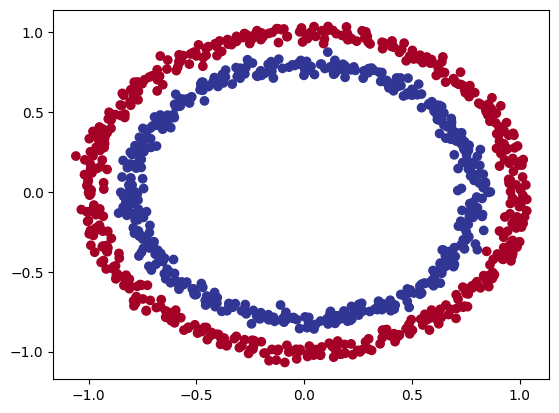

In [7]:
plt.scatter(X[:,0] , X[:,1] , c=y , cmap=plt.cm.RdYlBu)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
tf.random.set_seed(42)

model = Sequential(
    [
        Dense(100,activation='relu'),
        Dense(10,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

early_stopping = EarlyStopping(monitor='loss',patience=5)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,callbacks=[early_stopping])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5188 - loss: 0.6868
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6100 - loss: 0.6478 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - loss: 0.5400 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.3527 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.1803 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0848 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0503 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0403 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0342 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0294 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0283 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0086  
Model Accuracy on Test Data: 100.00%


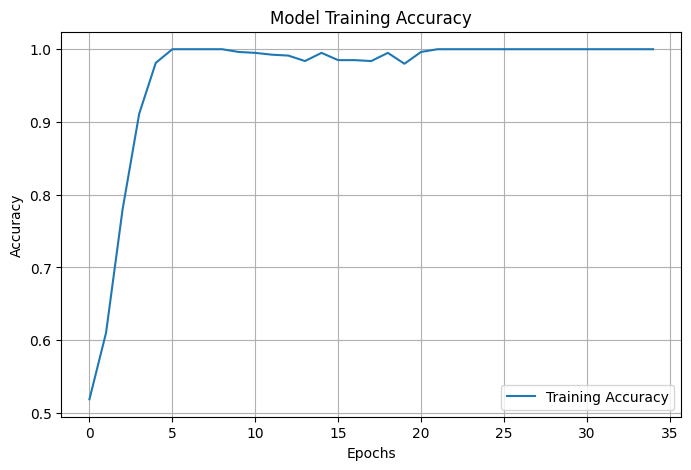

In [17]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(8, 5))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.title('Model Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


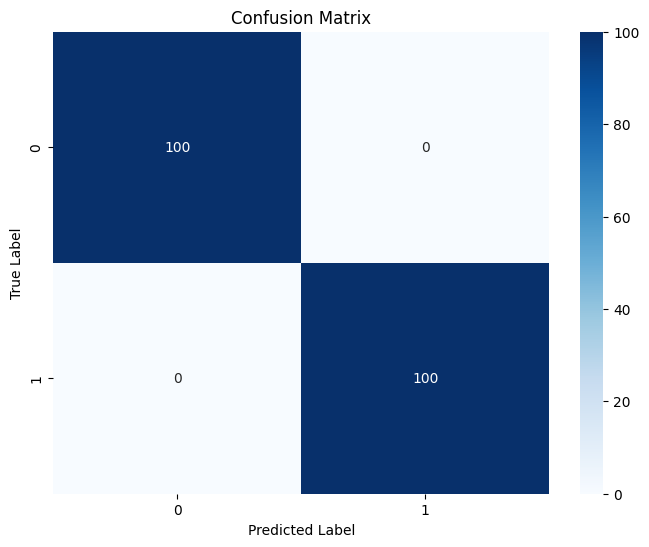

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test data
y_pred = model.predict(X_test)
# Convert prediction probabilities to binary classes (0 or 1)
y_pred_classes = tf.round(y_pred)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
def plot_decision_boundary(model, X, y, ax, title="Decision Boundary"):
    """
    Plots the decision boundary on a given Matplotlib axis (ax).
    """
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred_probs = model.predict(x_in)
    y_pred_classes = np.round(y_pred_probs).reshape(xx.shape)

    ax.contourf(xx, yy, y_pred_classes, cmap=plt.cm.RdYlBu, alpha=0.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


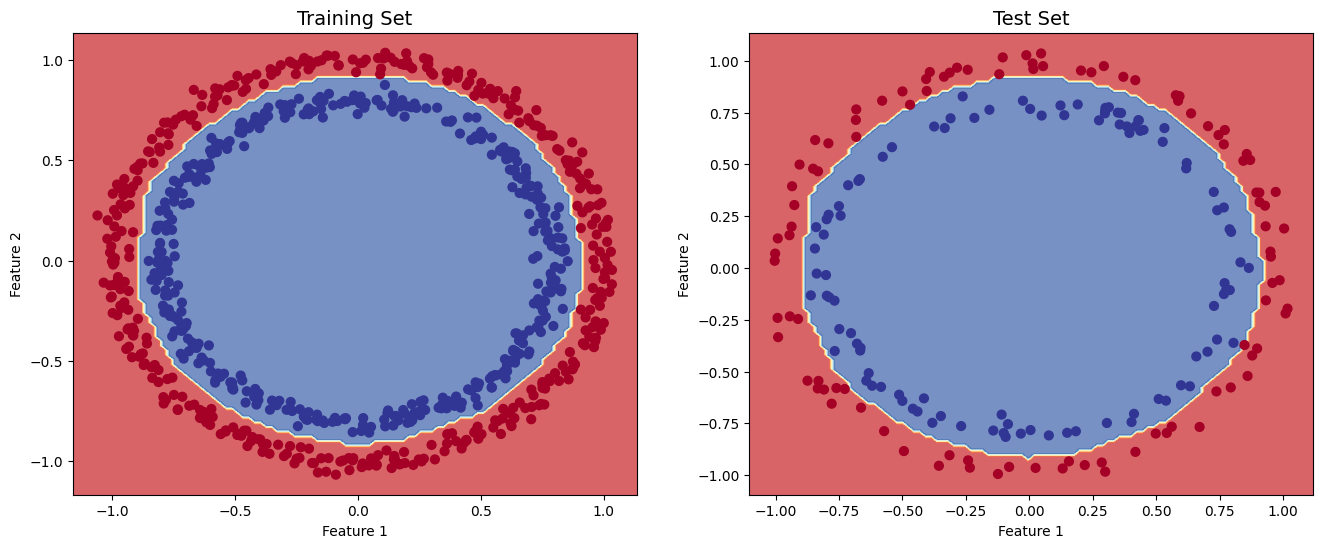

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_decision_boundary(model, X_train, y_train, ax=ax1, title="Training Set")
plot_decision_boundary(model, X_test, y_test, ax=ax2, title="Test Set")
plt.show()